# Laboratorio 7: Filtrado de las señales del dataset

### 1. Cargando el dataset y escogiendo señales de ejemplo

46950 41850 99450
46950 41850 99450
[-59.80547391 -53.80547391 -38.80547391 ...  31.19452609  34.19452609
  39.19452609]


Text(0.5, 1.0, 'EMG')

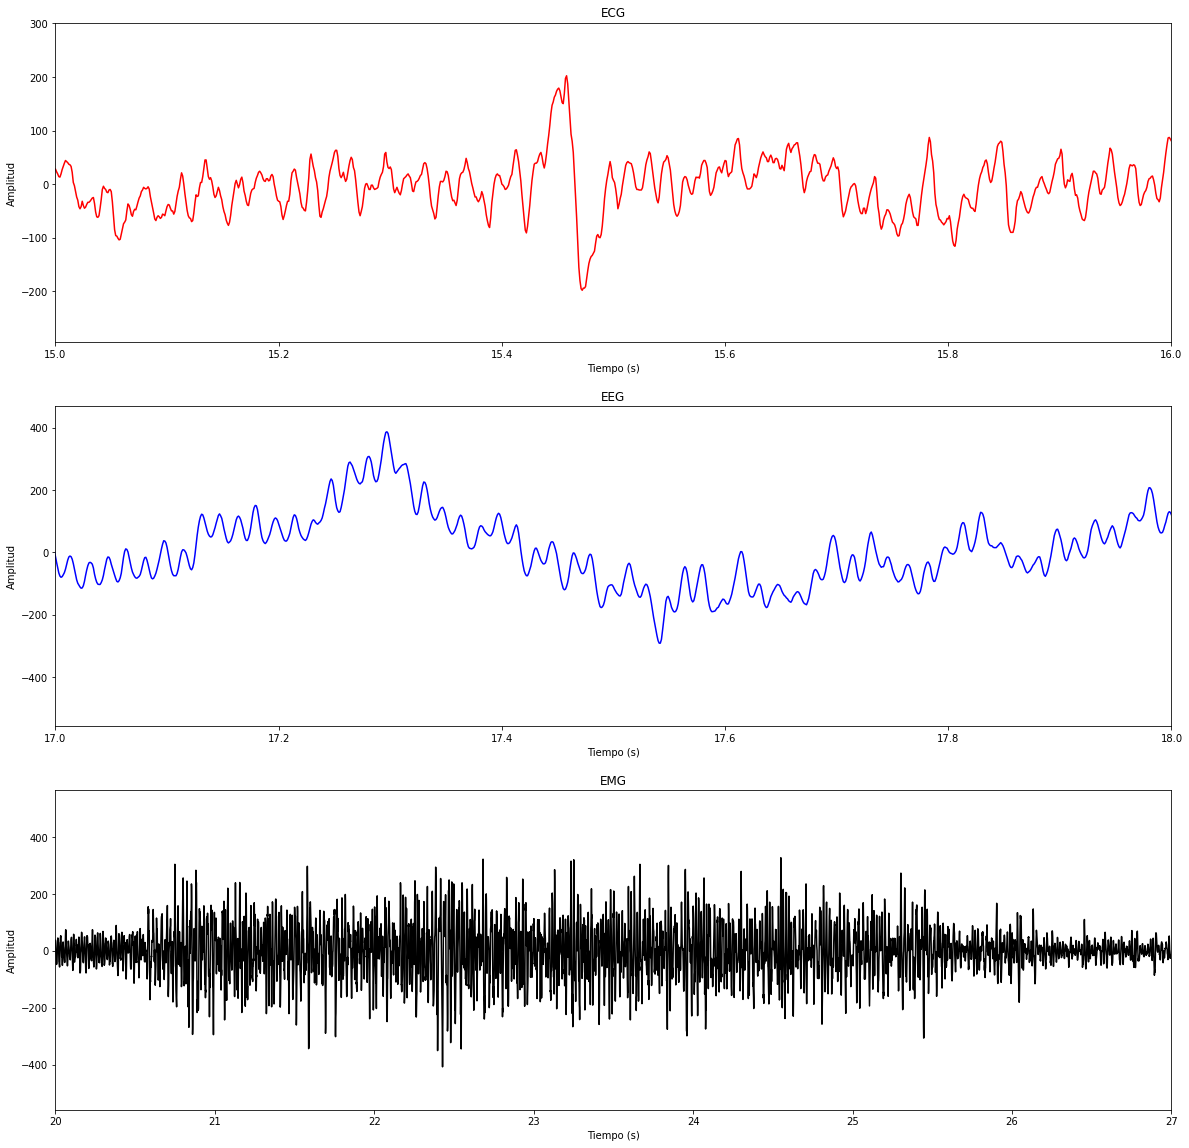

In [59]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
fs = 1000
ecg = np.genfromtxt("ecg.txt", delimiter="\t",skip_header = 3)[:,-2]
eeg = np.genfromtxt("eeg.txt", delimiter="\t",skip_header = 3)[:,-2]
emg = np.genfromtxt("emg.txt", delimiter="\t",skip_header = 3)[:,-2]
print(len(ecg), len(eeg), len(emg))
t_ecg = np.arange(0, len(ecg))/fs
t_eeg = np.arange(0, len(eeg))/fs
t_emg = np.arange(0, len(emg))/fs
print(len(t_ecg), len(t_eeg), len(t_emg))
ecg = ecg - np.mean(ecg)
eeg = eeg - np.mean(eeg)
emg = emg - np.mean(emg)
print(ecg)
plt.figure(figsize=(20,20))
plt.subplot(3, 1, 1);plt.plot(t_ecg, ecg,'r'); plt.xlabel("Tiempo (s)"); plt.ylabel("Amplitud");plt.xlim([15,16])
plt.title("ECG")
plt.subplot(3, 1, 2);plt.plot(t_eeg, eeg, 'b'); plt.xlabel("Tiempo (s)"); plt.ylabel("Amplitud");plt.xlim([17,18])
plt.title("EEG")
plt.subplot(3, 1, 3);plt.plot(t_emg, emg, 'k'); plt.xlabel( 'Tiempo (s)'); plt.ylabel("Amplitud");plt.xlim([20,27])
plt.title("EMG")


### 2. Ploteando en el dominio de la frecuencia

Text(0.5, 1.0, 'DFT EMG')

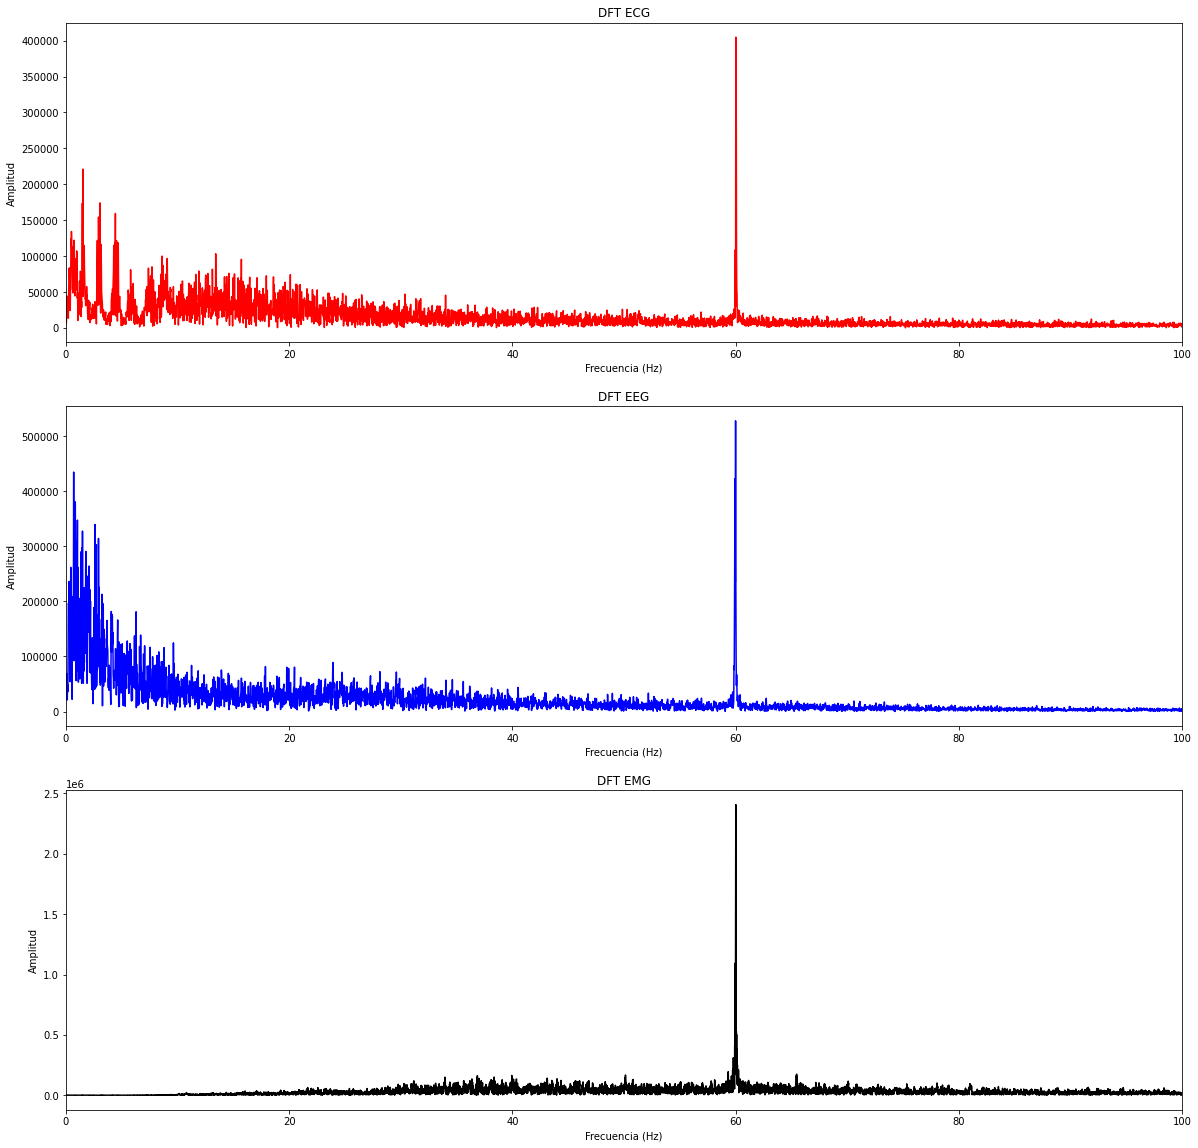

In [60]:
Fs=1000
N1 = len(ecg)
N2 = len(eeg)
N3 = len(emg)
SAMP1 = np.fft.fft(ecg)
SAMP1 = SAMP1 [0:N1//2]
SAMP2 = np.fft.fft(eeg)
SAMP2  = SAMP2 [0:N2//2]
SAMP3 = np.fft.fft(emg)
SAMP3  = SAMP3 [0:N3//2]

#f = n*Fs/(N-1) - Fs/2
f1= np.linspace(0,Fs/2,N1//2)
f2= np.linspace(0,Fs/2,N2//2)
f3= np.linspace(0,Fs/2,N3//2)
#f = np.fft.fftshift(f)

plt.figure(figsize=(20,20))
plt.subplot(3, 1, 1);plt.plot(f1[1:], np.abs(SAMP1)[1:],'r'); plt.xlabel("Frecuencia (Hz)"); plt.ylabel("Amplitud");plt.xlim(0,100)
plt.title("DFT ECG")
plt.subplot(3, 1, 2);plt.plot(f2[1:], np.abs(SAMP2)[1:], 'b'); plt.xlabel("Frecuencia (Hz)"); plt.ylabel("Amplitud");plt.xlim(0,100)
plt.title("DFT EEG")
plt.subplot(3, 1, 3);plt.plot(f3, np.abs(SAMP3), 'k');plt.xlabel("Frecuencia (Hz)"); plt.ylabel("Amplitud");plt.xlim(0,100)
plt.title("DFT EMG")


### 3. Diseño de filtro pasabandas IIR de tipo butterworth y función de transferencia

Text(0.5, 1.0, 'Notch Filter Frequency Response')

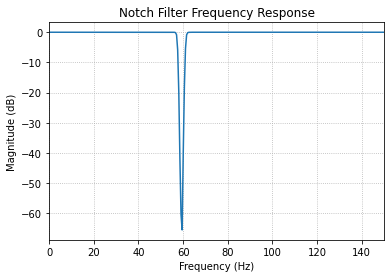

In [111]:
Wc1 = 58*2*np.pi
Wc2 = 62*2*np.pi
b,a = signal.butter(5, [Wc1, Wc2], 'bandstop', True, 'ba')
Fmax=500
F_freqs = np.linspace(0,Fmax,1000)
W_freqs = 2*np.pi*F_freqs  #Angular frecuences
bd, ad = signal.bilinear(b,a,Fs)

F_freqs = np.linspace(0, Fmax, 1000)
w, h = signal.freqz(bd, ad, worN=F_freqs * np.pi * 2 / Fs)

W_freqs, H = signal.freqs(b,a,W_freqs)
plt.plot(w * Fs / (2 * np.pi), 20 * np.log10(abs(h)))
plt.grid(linestyle=":")
plt.xlim([0, 150])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.title("Notch Filter Frequency Response")

### 4. Aplicación del filtro IIR en la señal

Text(0.5, 1.0, 'EMG filtro IIR')

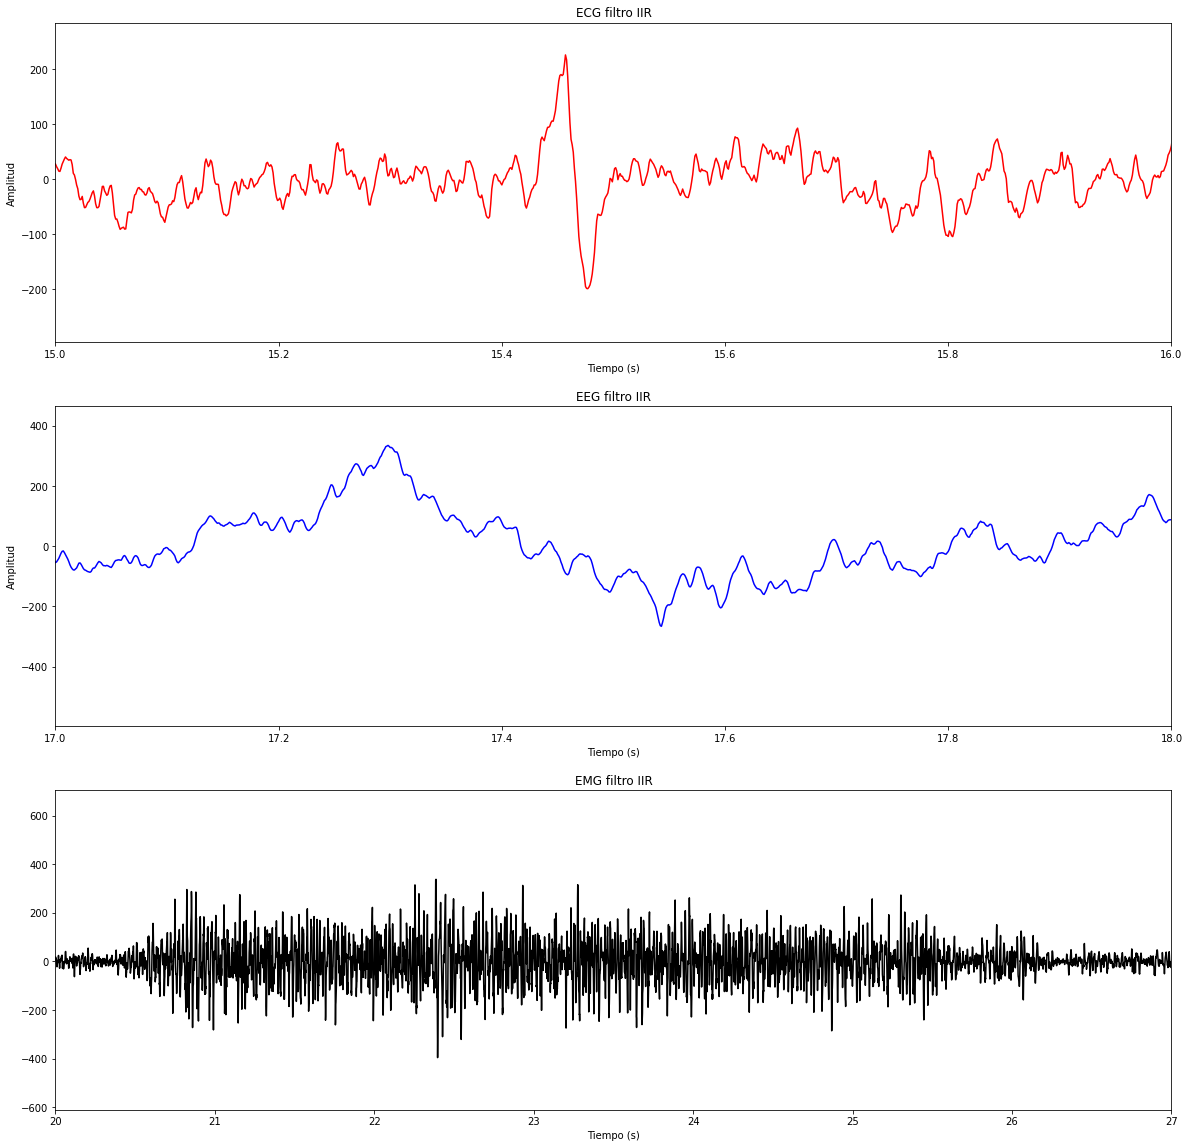

In [112]:

ecg_filt = signal.lfilter(bd,ad, ecg) 
eeg_filt = signal.lfilter(bd,ad, eeg) 
emg_filt = signal.lfilter(bd,ad, emg)

plt.figure(figsize=(20,20))
plt.subplot(3, 1, 1);plt.plot(t_ecg, ecg_filt,'r'); plt.xlabel("Tiempo (s)"); plt.ylabel("Amplitud");plt.xlim([15,16])
plt.title("ECG filtro IIR")
plt.subplot(3, 1, 2);plt.plot(t_eeg, eeg_filt, 'b'); plt.xlabel("Tiempo (s)"); plt.ylabel("Amplitud");plt.xlim([17,18])
plt.title("EEG filtro IIR")
plt.subplot(3, 1, 3);plt.plot(t_emg, emg_filt, 'k'); plt.xlabel( 'Tiempo (s)');plt.xlim([20,27])
plt.title("EMG filtro IIR")

### 4. Dominio de frecuencia de la señal filtrada

Text(0.5, 1.0, 'Agitado')

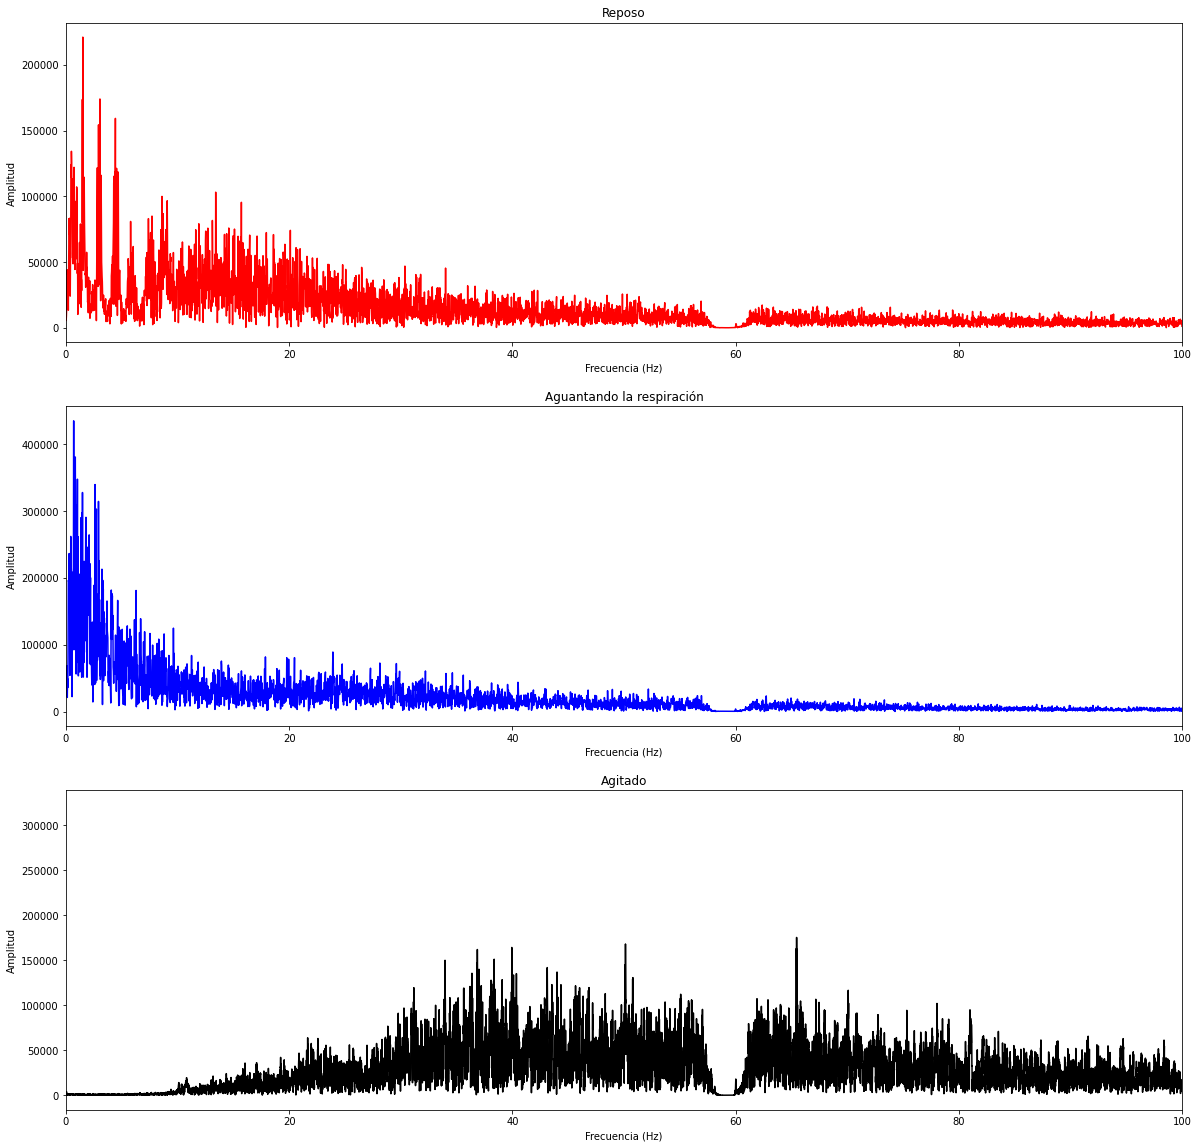

In [113]:

SAMP1 = np.fft.fft(ecg_filt)
SAMP1 = SAMP1 [0:N1//2]
SAMP2 = np.fft.fft(eeg_filt)
SAMP2  = SAMP2 [0:N2//2]
SAMP3 = np.fft.fft(emg_filt)
SAMP3  = SAMP3 [0:N3//2]

#f = n*Fs/(N-1) - Fs/2
f1= np.linspace(0,Fs/2,N1//2)
f2= np.linspace(0,Fs/2,N2//2)
f3= np.linspace(0,Fs/2,N3//2)
#f = np.fft.fftshift(f)

plt.figure(figsize=(20,20))
plt.subplot(3, 1, 1);plt.plot(f1[1:], np.abs(SAMP1)[1:],'r'); plt.xlabel("Frecuencia (Hz)"); plt.ylabel("Amplitud");plt.xlim(0,100)
plt.title("Reposo")
plt.subplot(3, 1, 2);plt.plot(f2[1:], np.abs(SAMP2)[1:], 'b'); plt.xlabel("Frecuencia (Hz)"); plt.ylabel("Amplitud");plt.xlim(0,100)
plt.title("Aguantando la respiración")
plt.subplot(3, 1, 3);plt.plot(f3, np.abs(SAMP3), 'k');plt.xlabel("Frecuencia (Hz)"); plt.ylabel("Amplitud");plt.xlim(0,100)
plt.title("Agitado")

### 5. Diseño de filtro FIR con ventana hamming

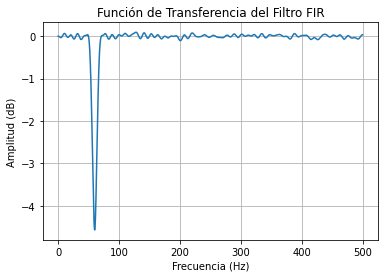

In [124]:
#longitud de la ventana
M = 201
#frecuencia de corte en Hz

# filtro fir
w = signal.firwin(numtaps=M, cutoff=[58, 62], window='hamming', fs=1000, pass_zero="bandstop")
w = np.round(w,3)
w_freq, h_freq = signal.freqz(w, worN=8000)

# Convierte a dB y escala la frecuencia a Hz
h_freq_db = 20 * np.log10(abs(h_freq))
w_freq_hz = w_freq * fs / (2 * np.pi)

# Gráfica de la función de transferencia
plt.figure()
plt.plot(w_freq_hz, h_freq_db)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud (dB)')
plt.title('Función de Transferencia del Filtro FIR')
plt.grid(True)
plt.show()

### 6. Aplicación del filtro FIR en la señal

Text(0.5, 1.0, 'EMG filtro FIR')

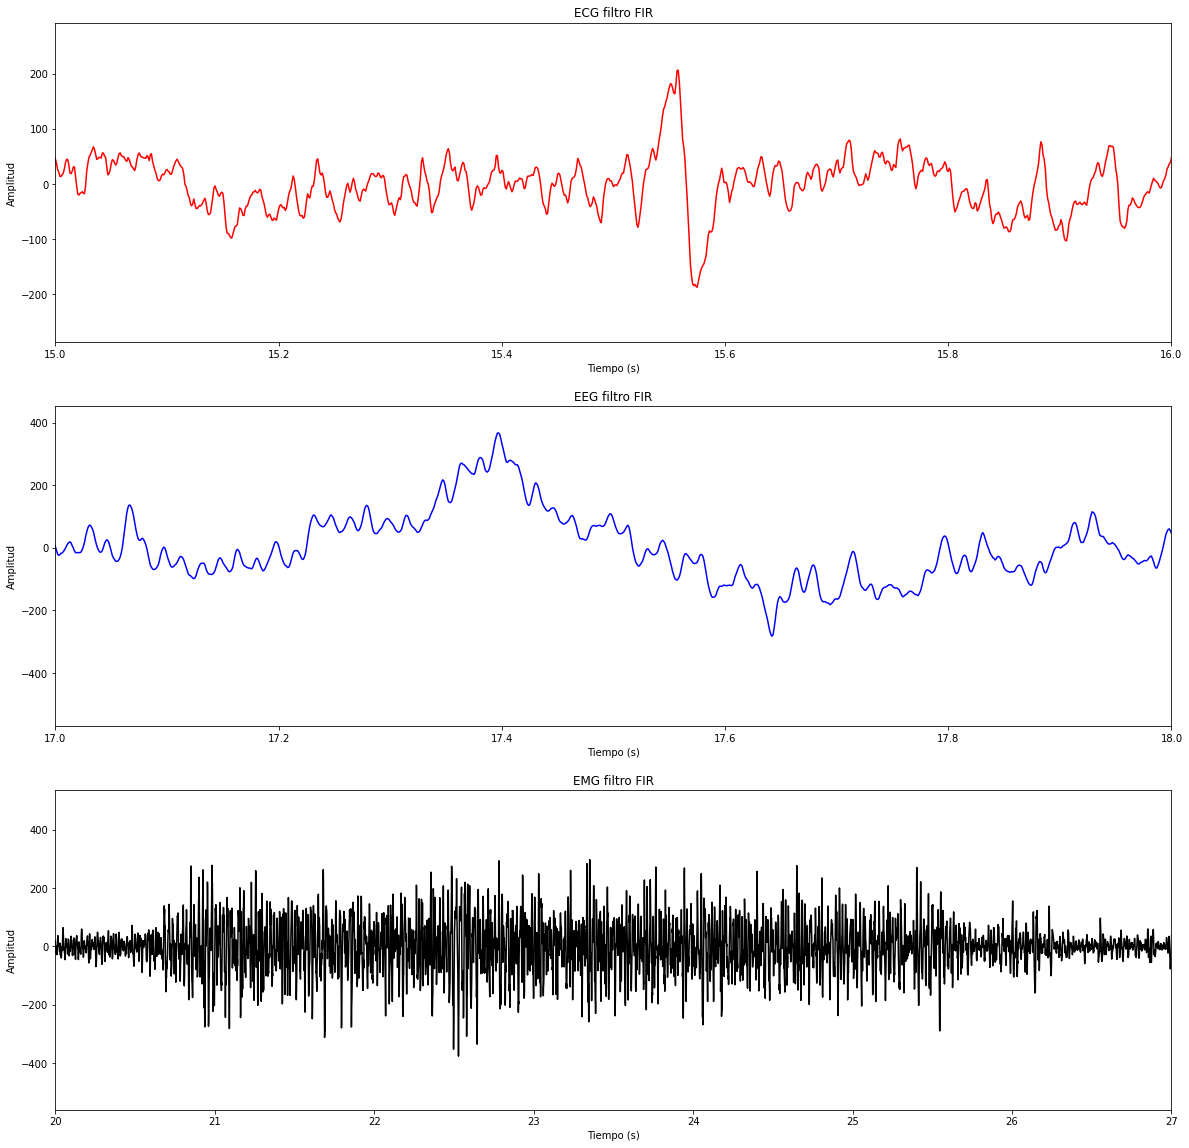

In [128]:

bd, ad = signal.bilinear(b,a,Fs)
ecg_filt_fir = signal.lfilter(w, np.array(1),ecg)
eeg_filt_fir = signal.lfilter(w,np.array(1), eeg) 
emg_filt_fir = signal.lfilter(w,np.array(1), emg)

plt.figure(figsize=(20,20))
plt.subplot(3, 1, 1);plt.plot(t_ecg, ecg_filt_fir,'r'); plt.xlabel("Tiempo (s)"); plt.ylabel("Amplitud");plt.xlim(15,16)
plt.title("ECG filtro FIR")
plt.subplot(3, 1, 2);plt.plot(t_eeg, eeg_filt_fir, 'b'); plt.xlabel("Tiempo (s)"); plt.ylabel("Amplitud");plt.xlim(17,18)
plt.title("EEG filtro FIR")
plt.subplot(3, 1, 3);plt.plot(t_emg, emg_filt_fir, 'k'); plt.xlabel( 'Tiempo (s)'); plt.ylabel("Amplitud");plt.xlim(20,27)
plt.title("EMG filtro FIR")


### Comparación de filtros FIR e IIR

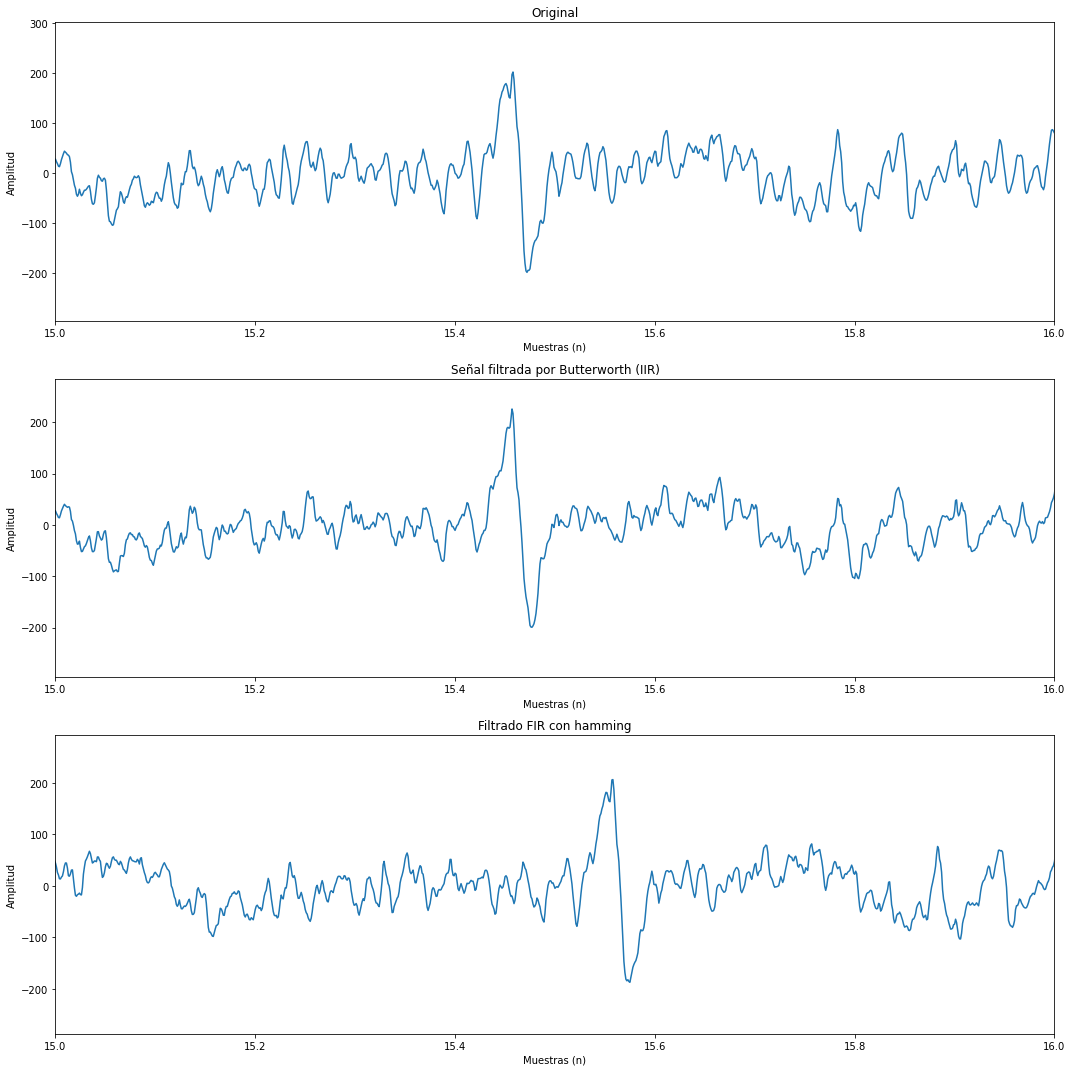

In [132]:
plt.figure(figsize=(15, 15))
plt.subplot(3, 1, 1)
plt.plot(t_ecg,ecg);plt.title("Original")
plt.xlabel("Muestras (n)");plt.ylabel("Amplitud");plt.xlim([15, 16])
plt.subplot(3, 1,2)
plt.title("Señal filtrada por Butterworth (IIR)");plt.xlim([15, 16])
plt.xlabel("Muestras (n)");plt.ylabel("Amplitud")
plt.plot(t_ecg,ecg_filt)
plt.subplot(3, 1, 3)
plt.plot(t_ecg,ecg_filt_fir);plt.title("Filtrado FIR con hamming");plt.xlim([15, 16])
plt.xlabel("Muestras (n)");plt.ylabel("Amplitud")
plt.tight_layout()


### Comparación completa de las señales filtradas por filtros de tipo IIR o FIR

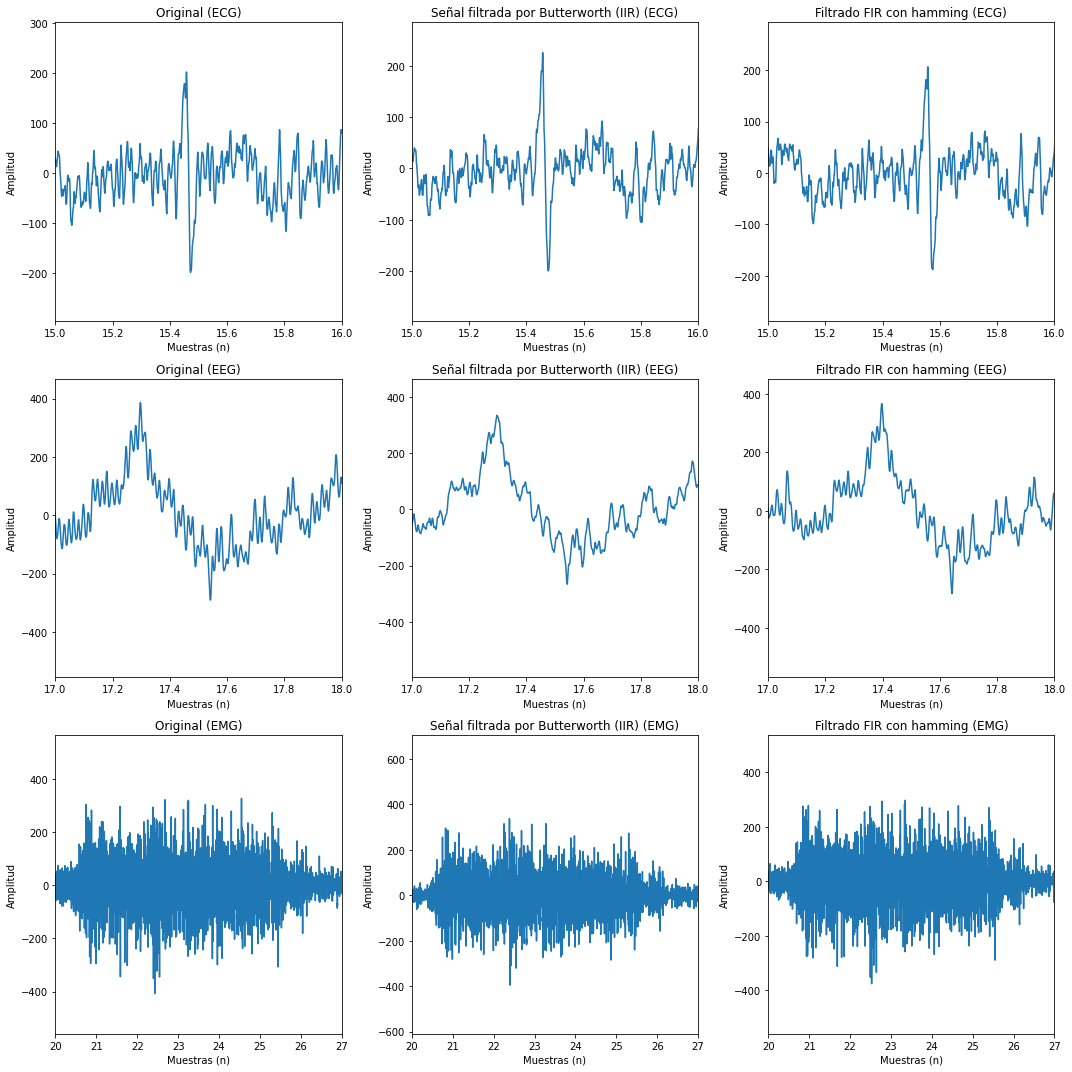

In [134]:
plt.figure(figsize=(15, 15))
plt.subplot(3, 3, 1)
plt.plot(t_ecg, ecg);plt.title("Original (ECG)");plt.xlim([15, 16])
plt.xlabel("Muestras (n)");plt.ylabel("Amplitud")
plt.subplot(3, 3,2)
plt.title("Señal filtrada por Butterworth (IIR) (ECG)");plt.xlim([15, 16])
plt.xlabel("Muestras (n)");plt.ylabel("Amplitud")
plt.plot(t_ecg, ecg_filt)
plt.subplot(3, 3, 3)
plt.plot(t_ecg, ecg_filt_fir);plt.title("Filtrado FIR con hamming (ECG)");plt.xlim([15, 16])
plt.xlabel("Muestras (n)");plt.ylabel("Amplitud")
plt.subplot(3, 3, 4)
plt.plot(t_eeg, eeg);plt.title("Original (EEG)");plt.xlim([17, 18])
plt.xlabel("Muestras (n)");plt.ylabel("Amplitud")
plt.subplot(3, 3,5)
plt.title("Señal filtrada por Butterworth (IIR) (EEG)");plt.xlim([17, 18])
plt.xlabel("Muestras (n)");plt.ylabel("Amplitud")
plt.plot(t_eeg, eeg_filt)
plt.subplot(3, 3, 6)
plt.plot(t_eeg, eeg_filt_fir);plt.title("Filtrado FIR con hamming (EEG)");plt.xlim([17, 18])
plt.xlabel("Muestras (n)");plt.ylabel("Amplitud")
plt.subplot(3, 3, 7)
plt.plot(t_emg, emg);plt.title("Original (EMG)");plt.xlim([20, 27])
plt.xlabel("Muestras (n)");plt.ylabel("Amplitud")
plt.subplot(3, 3,8)
plt.title("Señal filtrada por Butterworth (IIR) (EMG)");plt.xlim([20, 27])
plt.xlabel("Muestras (n)");plt.ylabel("Amplitud")
plt.plot(t_emg, emg_filt)
plt.subplot(3, 3, 9)
plt.plot(t_emg, emg_filt_fir);plt.title("Filtrado FIR con hamming (EMG)");plt.xlim([20, 27])
plt.xlabel("Muestras (n)");plt.ylabel("Amplitud")
fig = plt.gcf()
fig.set_facecolor('white')
plt.tight_layout()